Dataset Shape: (81373, 10)
Unique Customers: 4111
Unique Products: 3289
Time Range: 2010-12-01 00:00:00 to 2011-12-09 00:00:00


C:\Users\manju\AppData\Local\Temp\ipykernel_2692\2344727498.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')


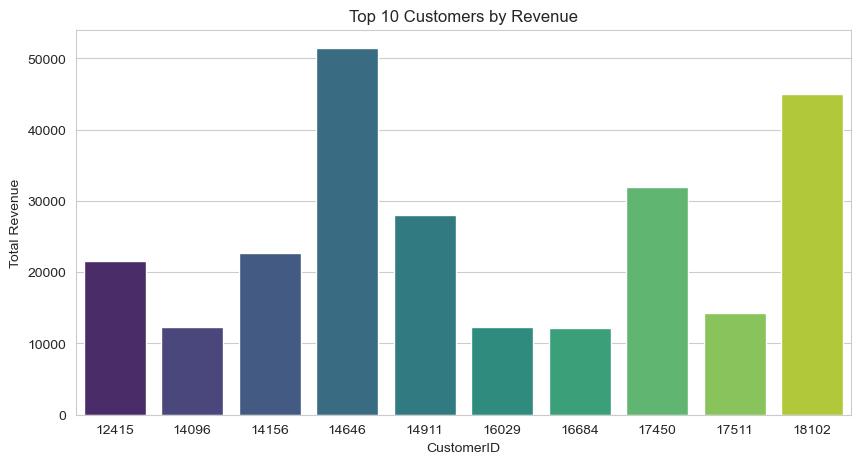

C:\Users\manju\AppData\Local\Temp\ipykernel_2692\2344727498.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_frequency.index, y=customer_frequency.values, palette='coolwarm')


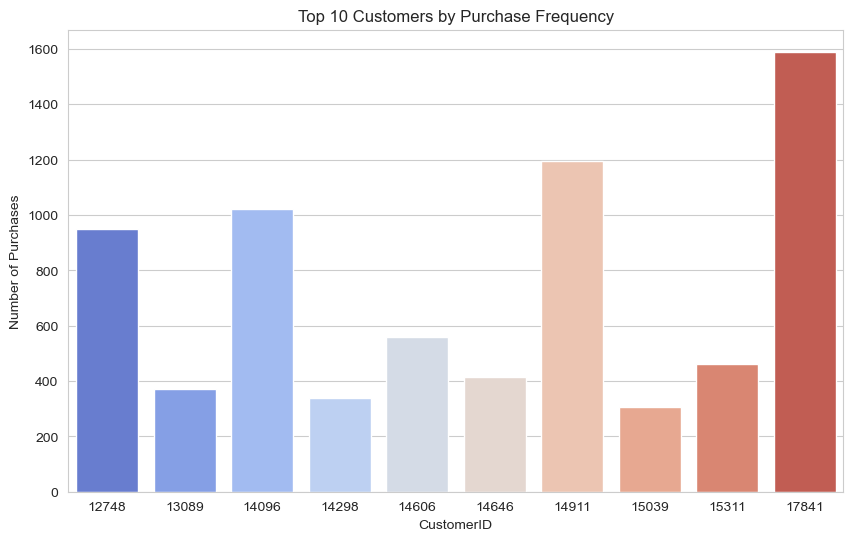

C:\Users\manju\AppData\Local\Temp\ipykernel_2692\2344727498.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='mako')


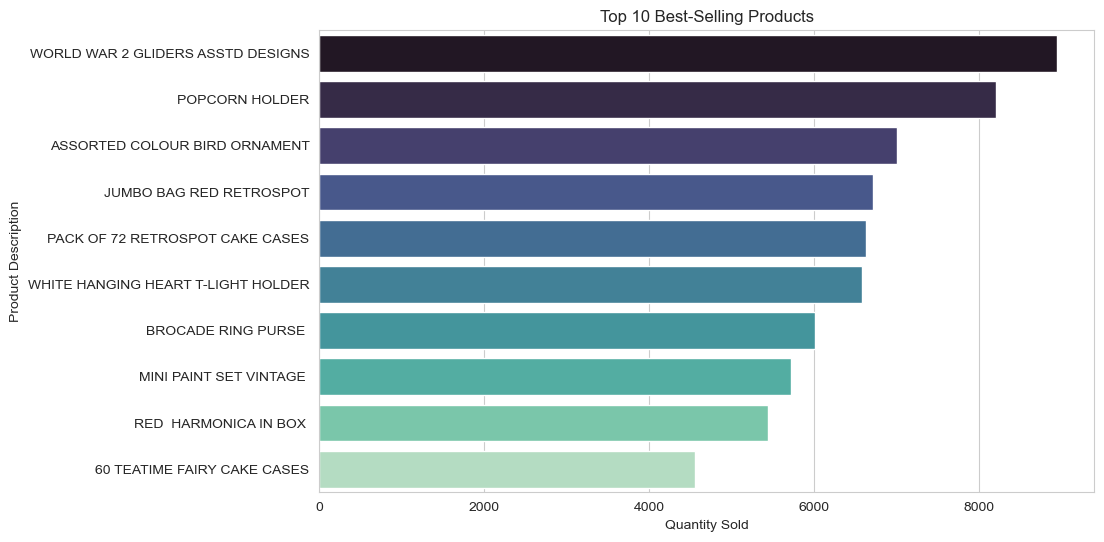

C:\Users\manju\AppData\Local\Temp\ipykernel_2692\2344727498.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='rocket')


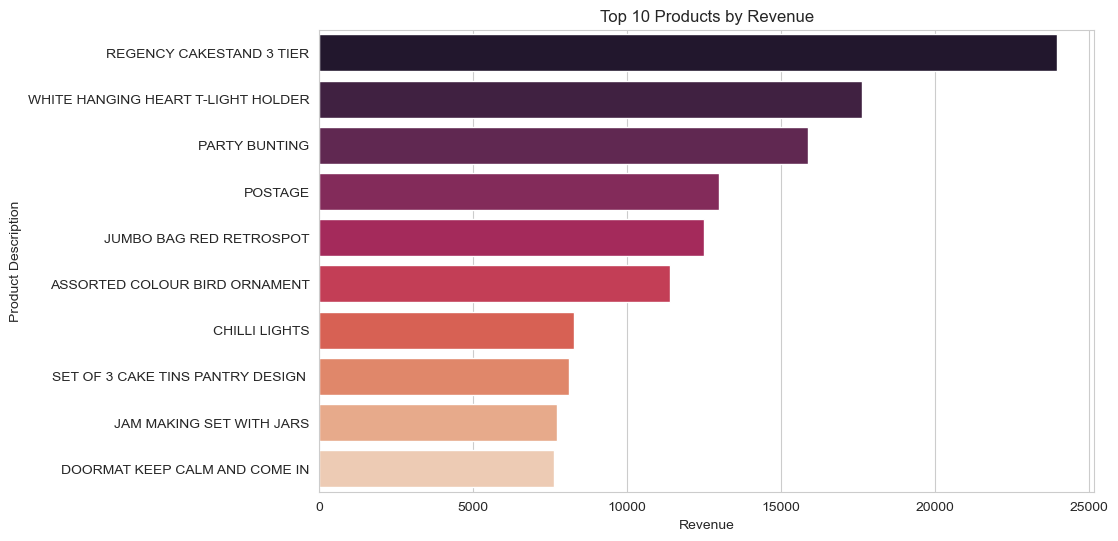

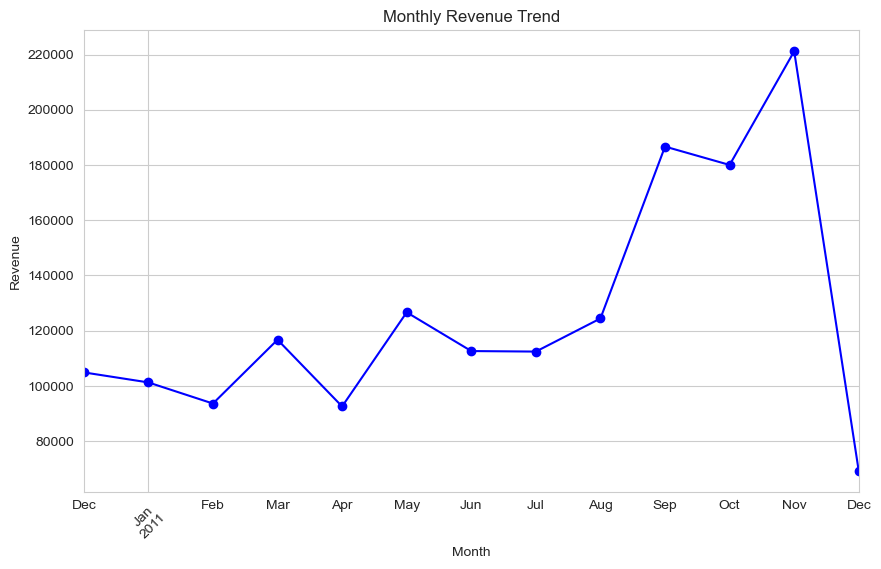

C:\Users\manju\AppData\Local\Temp\ipykernel_2692\2344727498.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_revenue.index, y=day_revenue.values, palette='cubehelix')


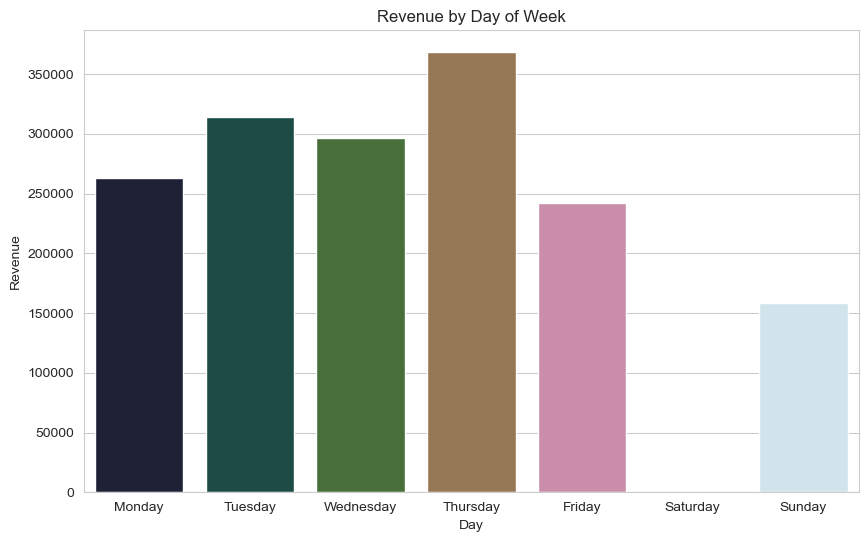

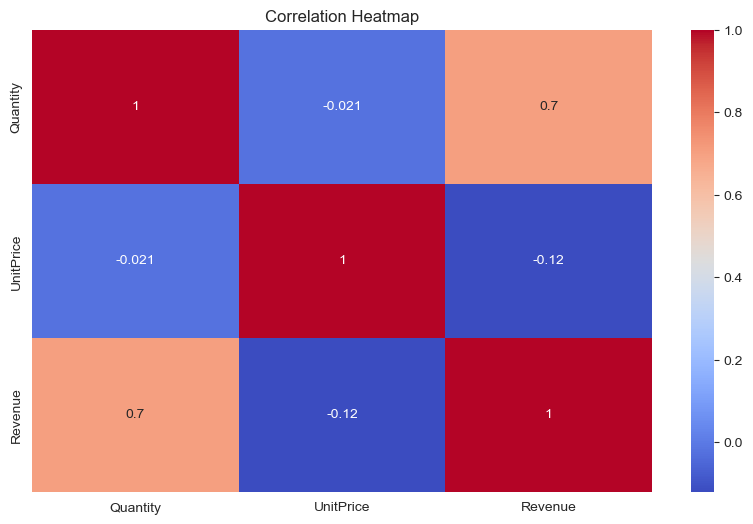

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('Ecommerce_Data-1.csv')

df = df.drop(columns=['Unnamed: 0'])

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.drop_duplicates(inplace=True)

print("Dataset Shape:", df.shape)
print("Unique Customers:", df['CustomerID'].nunique())
print("Unique Products:", df['StockCode'].nunique())
print("Time Range:", df['Date'].min(), "to", df['Date'].max())

top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.show()

customer_frequency = df['CustomerID'].value_counts().head(10)
sns.barplot(x=customer_frequency.index, y=customer_frequency.values, palette='coolwarm')
plt.title('Top 10 Customers by Purchase Frequency')
plt.xlabel('CustomerID')
plt.ylabel('Number of Purchases')
plt.show()

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='mako')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

top_products_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='rocket')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Description')
plt.show()

df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()

monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

df['DayOfWeek'] = df['Date'].dt.day_name()
day_revenue = df.groupby('DayOfWeek')['Revenue'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

sns.barplot(x=day_revenue.index, y=day_revenue.values, palette='cubehelix')
plt.title('Revenue by Day of Week')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

sns.heatmap(df[['Quantity','UnitPrice','Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
